# Modelo GAN simple

In [74]:
from matplotlib import pyplot
from numpy.random import rand
from numpy.random import randn
from numpy import hstack

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

from numpy import zeros
from numpy import ones

In [18]:
# Se define una función

def calculate(x):
    return x**2

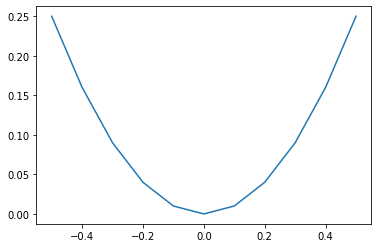

In [19]:
#Definición de inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]

#Cálculo de outputs
outputs = [calculate(x) for x in inputs]

#Gráficar la salida
pyplot.plot(inputs, outputs)
pyplot.show()

In [23]:
a = rand(4)
print(a.shape)
print(a)

(4,)
[0.65608364 0.15078854 0.65800549 0.01968841]


In [24]:
a = a.reshape(4,1)  #convierte el array en una matriz
print(a.shape)
print(a)

(4, 1)
[[0.65608364]
 [0.15078854]
 [0.65800549]
 [0.01968841]]


In [79]:
b = rand(4) - 0.5
b = b.reshape(4,1)
print (hstack((a,b)))
print (hstack((a,b)).shape)

[[ 0.65608364 -0.14793482]
 [ 0.15078854 -0.36006049]
 [ 0.65800549 -0.05520567]
 [ 0.01968841  0.47755174]]
(4, 2)


In [27]:
#generación de muestras aleatorias de la función
def generate_samples(n=100):
    #en el rango [-0.5, 0.5]
    #array de longitud 100
    x1 = rand(n) - 0.5
    x2 = x1**2
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    return hstack((x1,x2)) #hstack concatena verticalmente

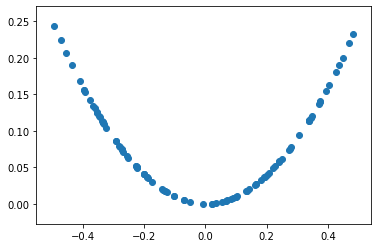

In [29]:
#generación de muestras
data = generate_samples()
pyplot.scatter(data[:,0], data[:,1])
pyplot.show()

### Definición del Modelo Discriminador

In [52]:
def define_discriminator(n_inputs=2):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model    

In [55]:
model = define_discriminator()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 25)                75        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [59]:
tf.keras.utils.plot_model(
    model, to_file='discriminator_plot.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [60]:
def generate_real_samples(n):
    #en el rango [-0.5, 0.5]
    x1 = rand(n) - 0.5
    x2 = x1**2
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    x = hstack((x1,x2))
    y = ones((n,1))  #hstack concatena verticalmente
    return  x, y #x dim (n,2) E [-0.5, 0.5], y dim (n,1) E 1

In [61]:
def generate_fake_samples(n):
    x1 = -1 + rand(n)*2  #entre [-1,1]
    x2 = -1 + rand(n)*2  #entre [-1,1]   
    x1 = x1.reshape(n, 1)
    x2 = x2.reshape(n, 1)
    x = hstack((x1,x2))
    y = zeros((n,1))
    return x, y  #x dim (n,2) E [-1, 1], y dim (n,1) E 0

In [66]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    half_batch = int(n_batch/2)
    for i in range(n_epochs):
        X_real, y_real = generate_real_samples(half_batch)
        model.train_on_batch(X_real, y_real)
        
        X_fake, y_fake = generate_fake_samples(half_batch)
        model.train_on_batch(X_fake, y_fake)        
        
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        print(i, acc_real, acc_fake)

In [67]:
train_discriminator(model)

0 0.578125 0.4375
1 0.453125 0.359375
2 0.46875 0.296875
3 0.59375 0.296875
4 0.4375 0.375
5 0.515625 0.359375
6 0.453125 0.328125
7 0.5 0.34375
8 0.390625 0.328125
9 0.53125 0.328125
10 0.484375 0.328125
11 0.4375 0.34375
12 0.421875 0.359375
13 0.421875 0.3125
14 0.65625 0.40625
15 0.4375 0.46875
16 0.5625 0.375
17 0.53125 0.4375
18 0.53125 0.390625
19 0.46875 0.40625
20 0.578125 0.4375
21 0.421875 0.34375
22 0.453125 0.375
23 0.578125 0.453125
24 0.46875 0.546875
25 0.53125 0.4375
26 0.34375 0.296875
27 0.5 0.53125
28 0.484375 0.5
29 0.453125 0.328125
30 0.5 0.328125
31 0.578125 0.5625
32 0.484375 0.453125
33 0.53125 0.40625
34 0.5625 0.375
35 0.46875 0.46875
36 0.484375 0.515625
37 0.375 0.515625
38 0.4375 0.359375
39 0.484375 0.5
40 0.375 0.453125
41 0.390625 0.421875
42 0.46875 0.390625
43 0.453125 0.53125
44 0.53125 0.5625
45 0.390625 0.59375
46 0.484375 0.5625
47 0.5 0.53125
48 0.375 0.421875
49 0.453125 0.53125
50 0.375 0.5
51 0.34375 0.515625
52 0.4375 0.5625
53 0.46875 0.515

### Definición del Generador

In [75]:
def define_generator(latent_dim, n_outputs=2):
    model = Sequential()
    model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(n_outputs, activation='linear'))
    return model


In [76]:
def generate_latent_points(latent_dim, n):
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

In [77]:
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    # predict outputs
    X = generator.predict(x_input)
    # plot the results
    pyplot.scatter(X[:, 0], X[:, 1])
    pyplot.show()
    


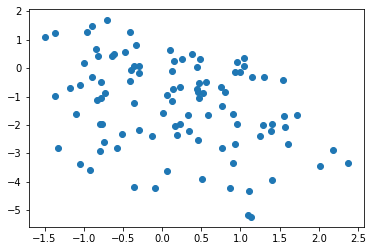

In [78]:
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)